In [1]:
# importing the required  libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing the data 
data = pd.read_csv("C:/Users/chanu/Desktop/bkp/IEE_GROWTH/Toddler Autism dataset July 2018.csv") 

In [2]:
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [3]:
#dimensions of the data
data.shape

(1054, 19)

In [4]:
#print the columns/features of the data
data.columns 

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [5]:
data = data.rename(columns={"Age_Mons":"Age Months", 
                        "Family_mem_with_ASD":"Family Member with ASD", 
                        "Class/ASD Traits ": "ASD Traits"})
data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age Months', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family Member with ASD', 'Who completed the test', 'ASD Traits'],
      dtype='object')

In [6]:
# listing the numericale features
num_cols=data.select_dtypes(include=np.number).columns
num_cols

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age Months', 'Qchat-10-Score'],
      dtype='object')

In [7]:
# listing the categorical features
cat_cols=data.select_dtypes(include='object').columns
cat_cols

Index(['Sex', 'Ethnicity', 'Jaundice', 'Family Member with ASD',
       'Who completed the test', 'ASD Traits'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age Months              1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [9]:
data.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age Months,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [10]:
# checking for missing values
data.null=data.isnull().sum()
data.null

C:\Users\chanu\AppData\Local\Temp\ipykernel_15100\1504268037.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.null=data.isnull().sum()


Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age Months                0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family Member with ASD    0
Who completed the test    0
ASD Traits                0
dtype: int64

In [11]:
# identify duplicate rows based on all columns
duplicates = data[data.duplicated()]

# keep the first instance of each duplicate row
data.drop_duplicates(keep='first', inplace=True)

# print the updated DataFrame
print(data)

      Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age Months  \
0           1   0   0   0   0   0   0   1   1   0    1          28   
1           2   1   1   0   0   0   1   1   0   0    0          36   
2           3   1   0   0   0   0   0   1   1   0    1          36   
3           4   1   1   1   1   1   1   1   1   1    1          24   
4           5   1   1   0   1   1   1   1   1   1    1          20   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...         ...   
1049     1050   0   0   0   0   0   0   0   0   0    1          24   
1050     1051   0   0   1   1   1   0   1   0   1    0          12   
1051     1052   1   0   1   1   1   1   1   1   1    1          18   
1052     1053   1   0   0   0   0   0   0   1   0    1          19   
1053     1054   1   1   0   0   1   1   0   1   1    0          24   

      Qchat-10-Score Sex       Ethnicity Jaundice Family Member with ASD  \
0                  3   f  middle eastern      yes                     no   
1      

In [12]:
data.shape

(1054, 19)

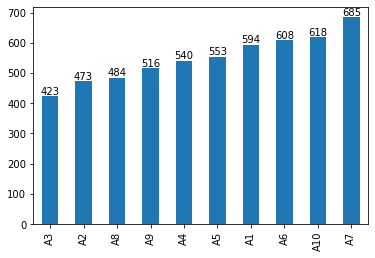

In [13]:
ax = data.iloc[:, 1:11].sum().sort_values().plot(kind="bar")
ax.bar_label(ax.containers[0]);

Observations

It has been witnessed from data that majority of the toddlers cared for thier parents when they were visibly upset. 
On the other hand, there were only 423 toddlers who showed an indication of craving for a toy or something.

# ASD Traits with other features

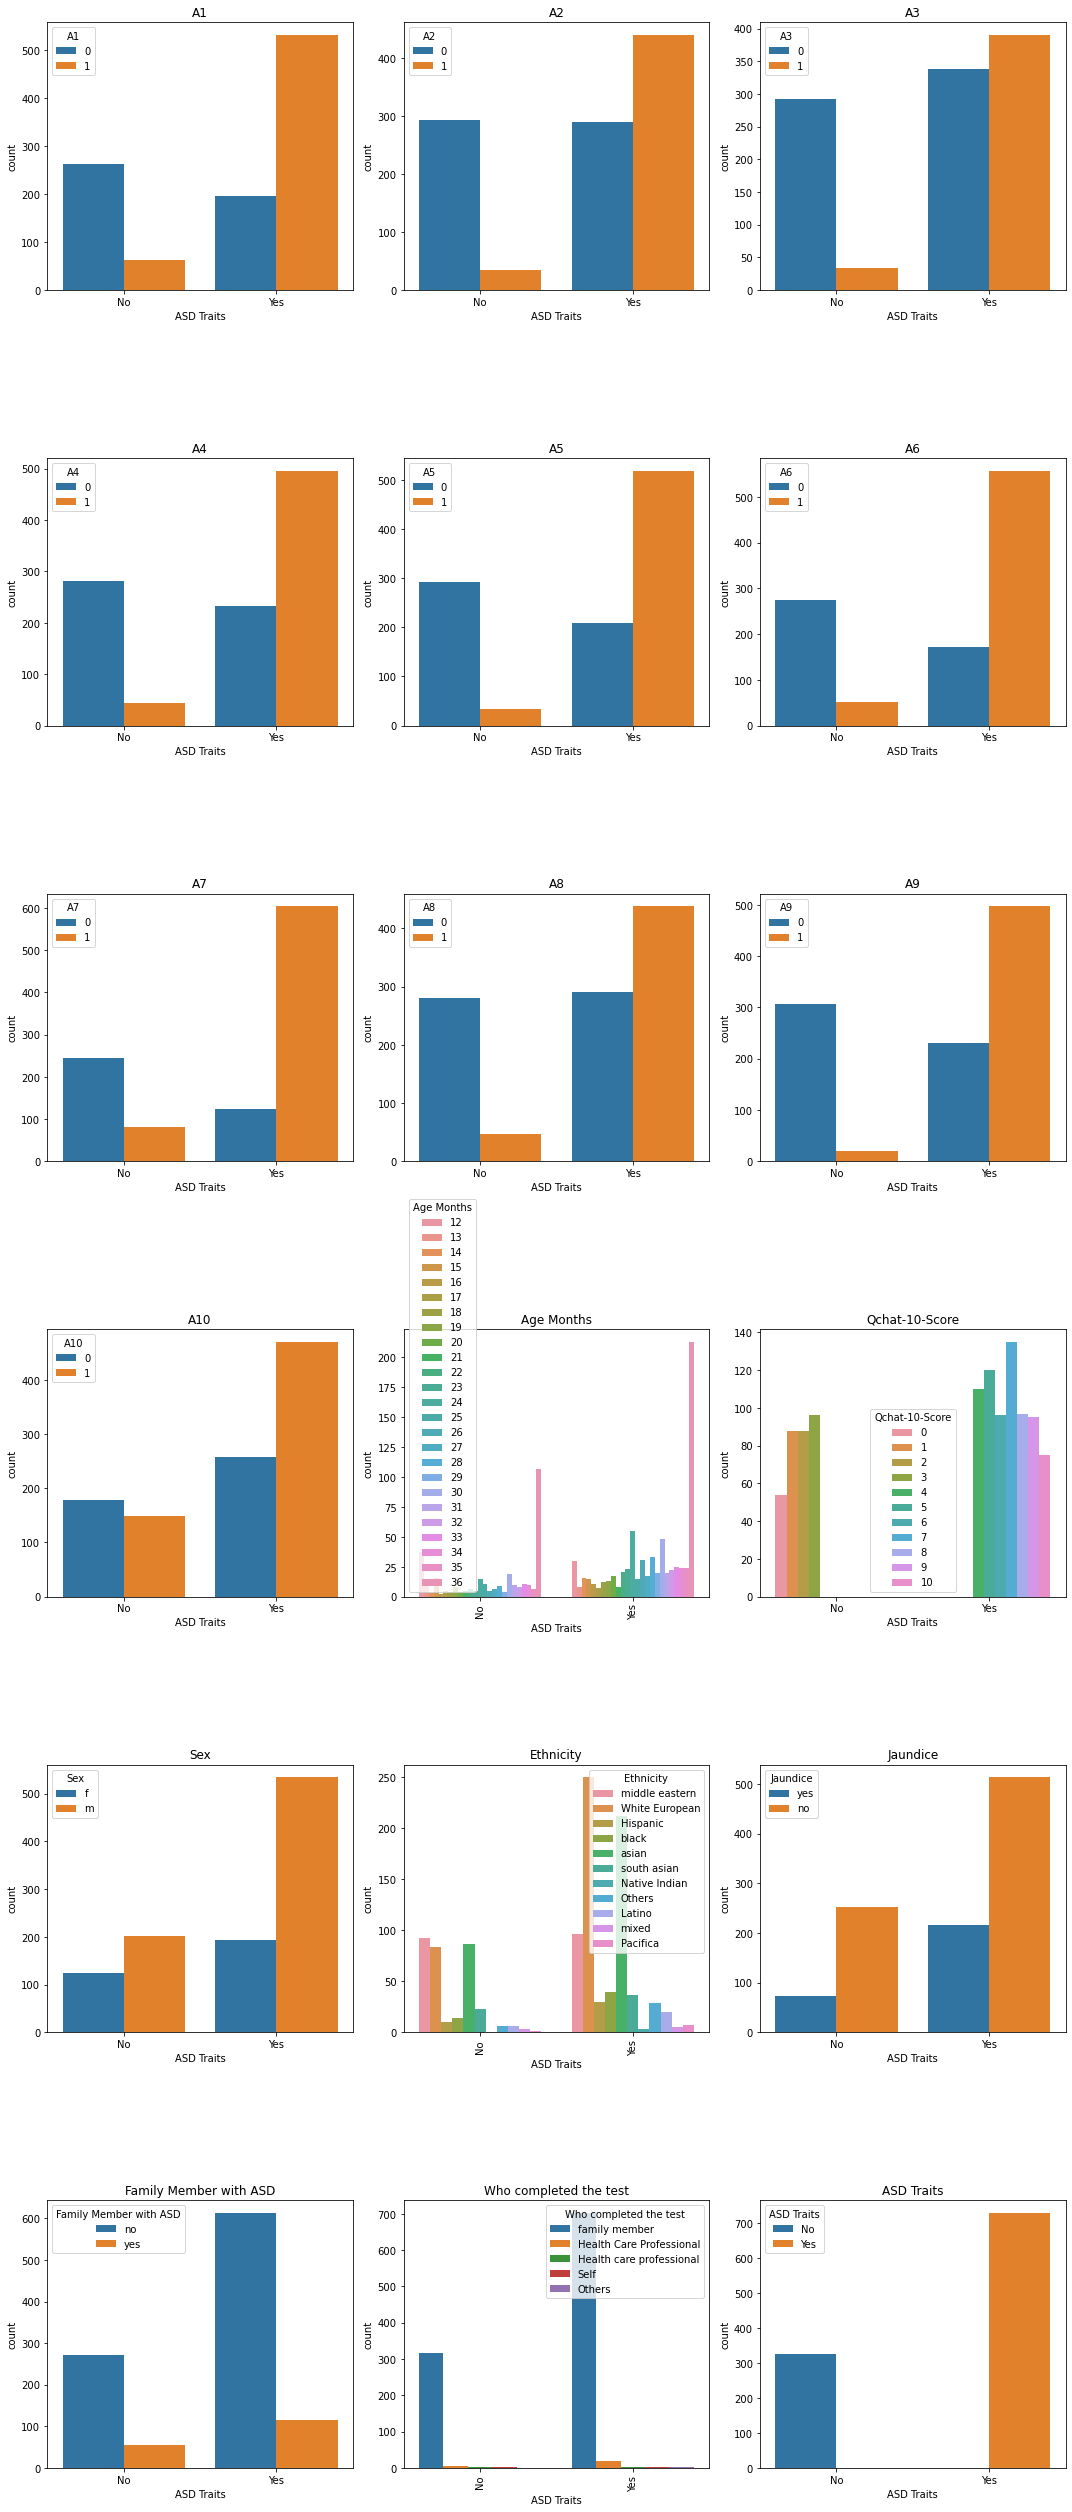

In [14]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))

axes = axes.ravel()
for i, col in enumerate(data.iloc[:, 1:]):
    sns.countplot(x=data["ASD Traits"], hue=data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

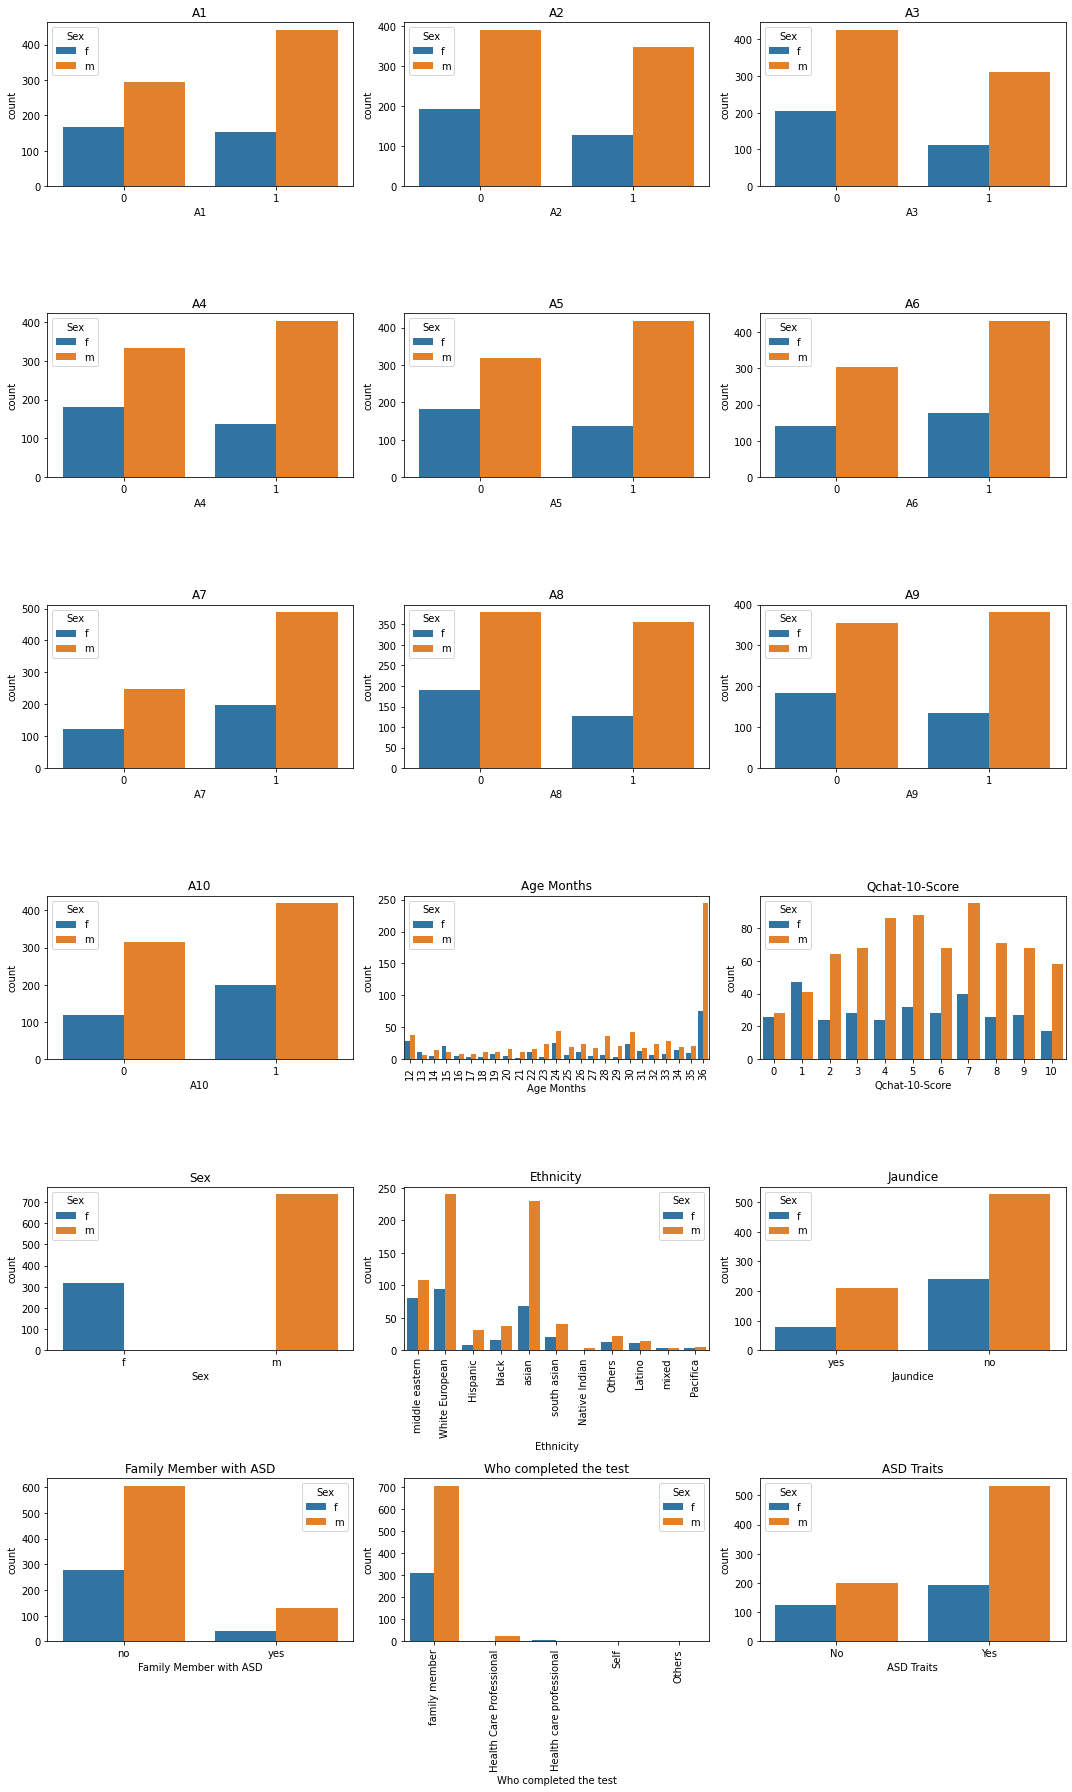

In [15]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25)) 

axes = axes.ravel()
for i, col in enumerate(data.iloc[:, 1:]):
    sns.countplot(x=data[col], hue=data["Sex"], ax=axes[i])
    axes[i].set_title(col)
    if col == 'Ethnicity' or col == "Who completed the test" or col == "Age Months":
        # Rotate the x-axis labels by 90 degrees
        axes[i].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

Observations

Similarly, the ratio of male to female toddlers with ASD is quite high.

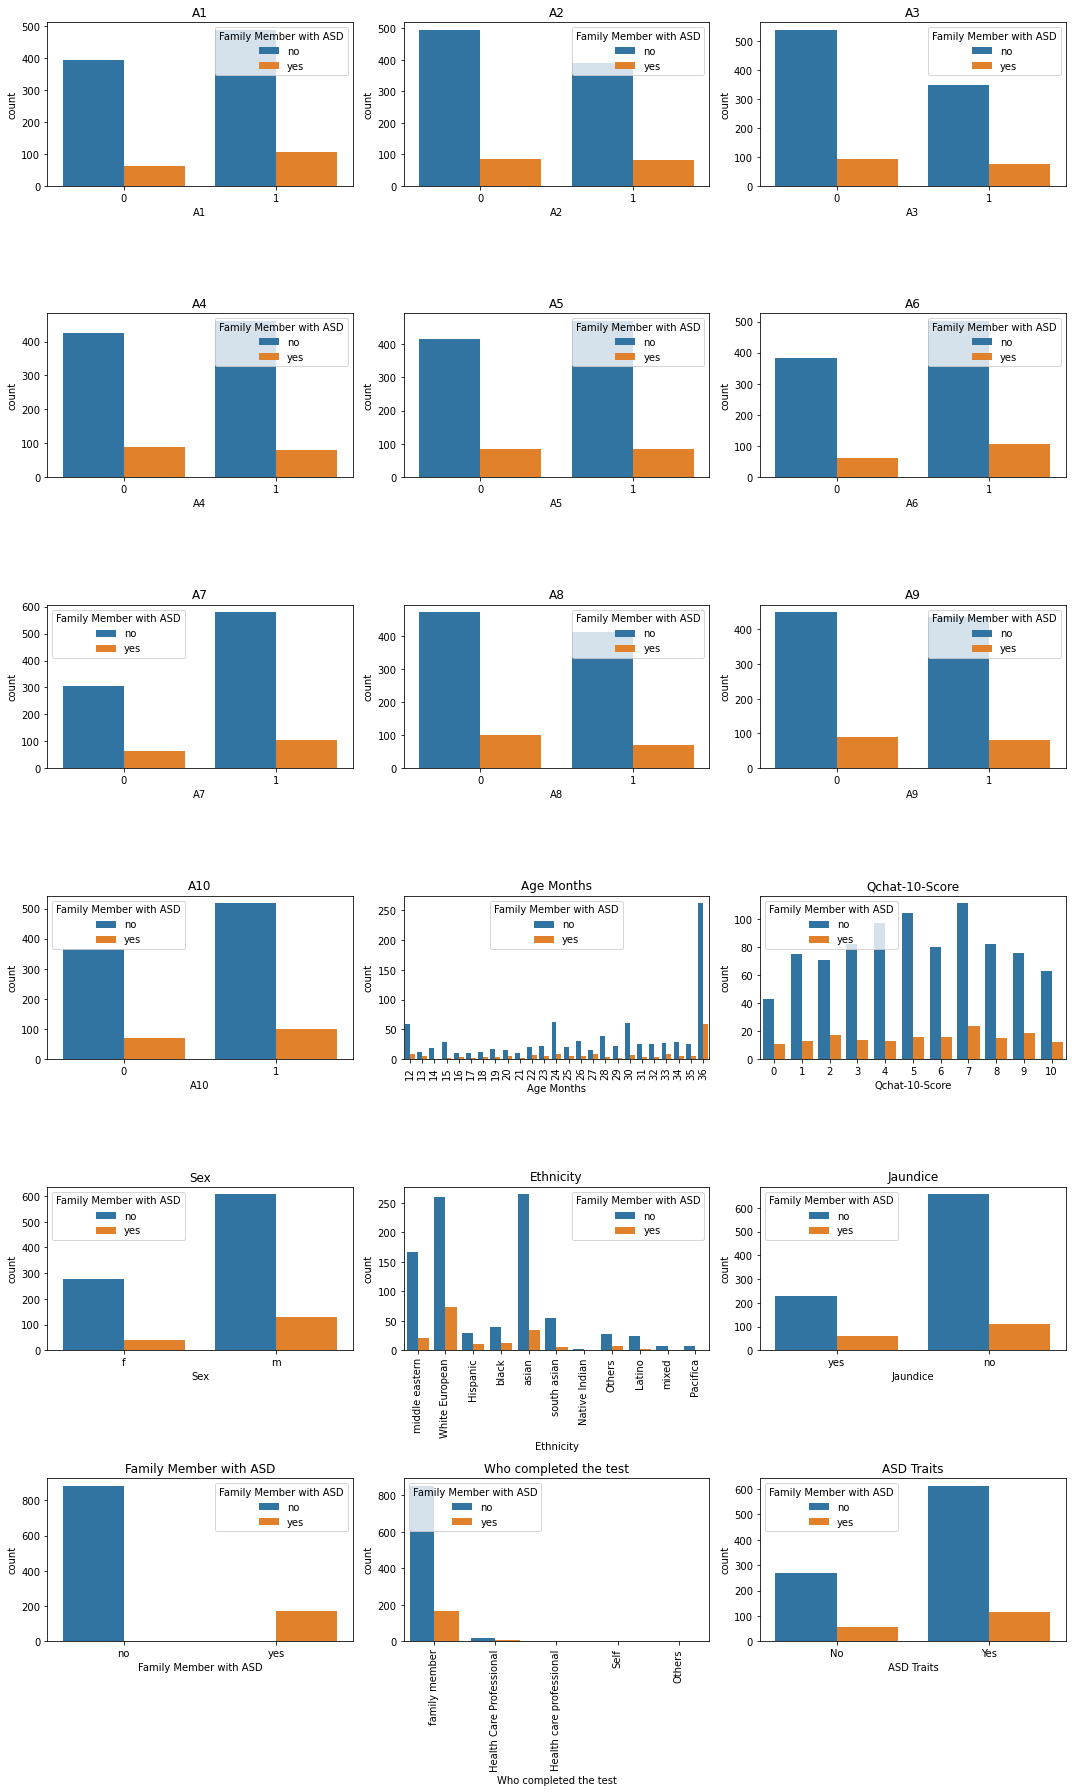

In [16]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25)) 

axes = axes.ravel()
for i, col in enumerate(data.iloc[:, 1:]):
    sns.countplot(x=data[col], hue=data["Family Member with ASD"], ax=axes[i])
    axes[i].set_title(col)
    if col == 'Ethnicity' or col == "Who completed the test" or col == "Age Months":
        # Rotate the x-axis labels by 90 degrees
        axes[i].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

Observations

The data shows that in all the cases, a few toddlers were having ASD. So, it also reflects that ASD is not a genetic disorder.

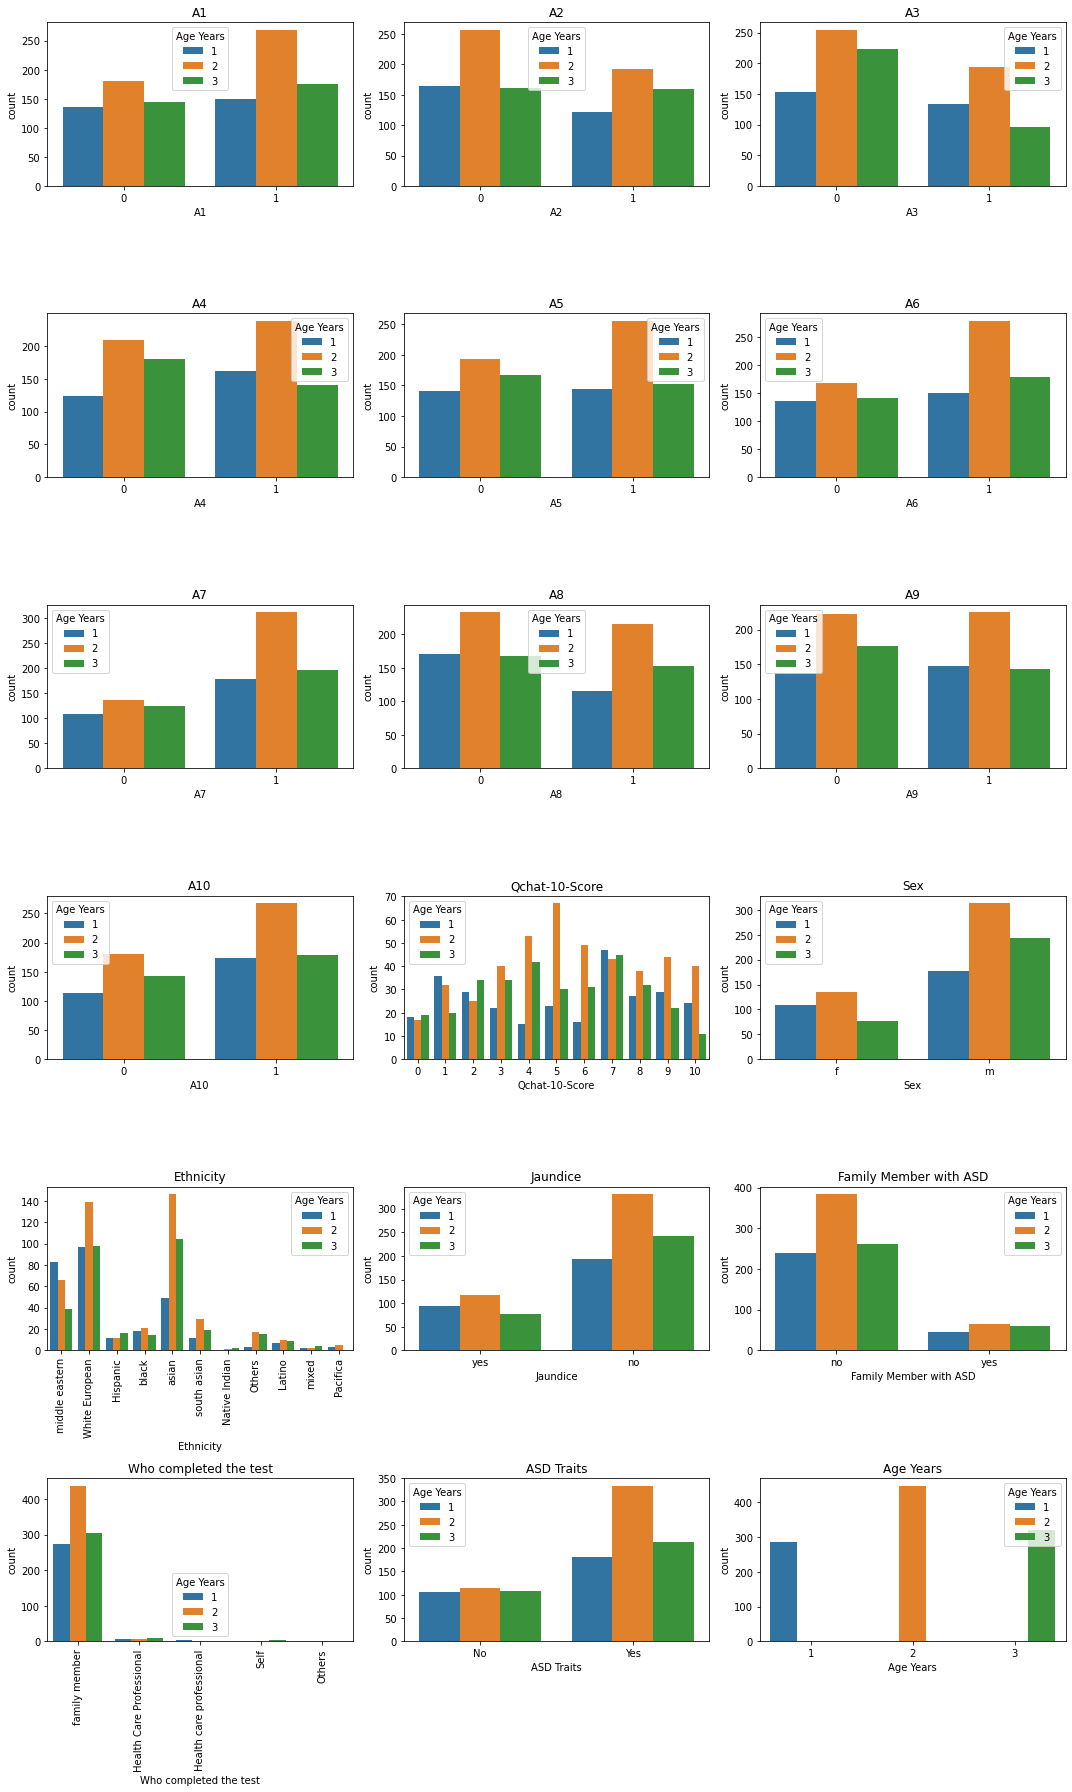

In [17]:

data["Age Years"] = (data["Age Months"] / 12).astype(int)
data.drop(columns=["Age Months"], axis=1, inplace=True)
fig, axes = plt.subplots(6, 3, figsize=(15, 25)) 

axes = axes.ravel()
for i, col in enumerate(data.iloc[:, 1:]):
    sns.countplot(x=data[col], hue=data["Age Years"], ax=axes[i])
    axes[i].set_title(col)
    if col == 'Ethnicity' or col == "Who completed the test" or col == "Age Months":
        # Rotate the x-axis labels by 90 degrees
        axes[i].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

Observations

Toddlers who are 1 year old has he higer chance that they will be affected by ASD because in this age it seems extremely high.

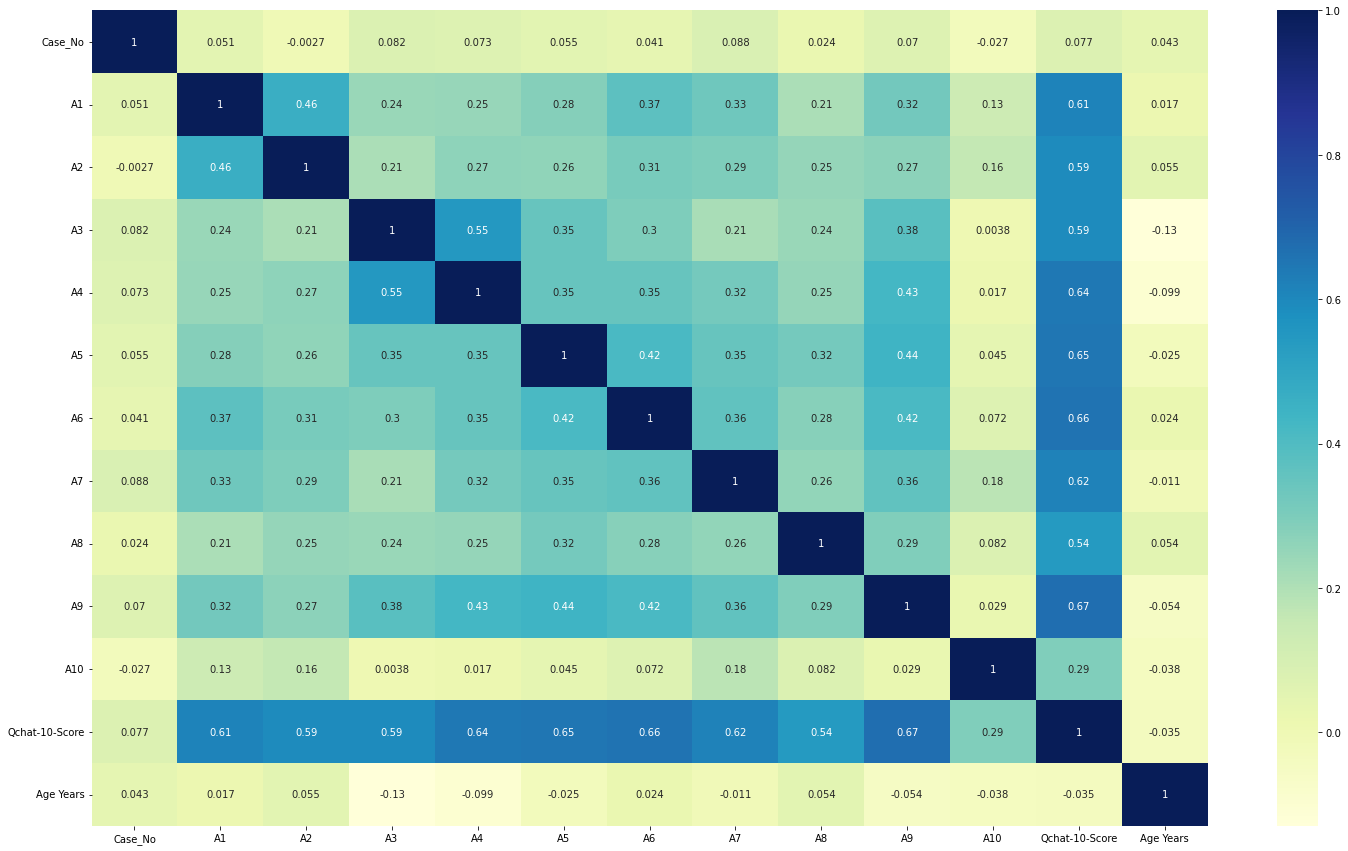

In [18]:
# print(data.corr())
plt.figure(figsize=(25,15))

# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Define the columns to encode
columns_to_encode = ['Sex', 'Ethnicity', 'Jaundice', 'Family Member with ASD',
       'Who completed the test', 'ASD Traits']

# Loop through each column and encode the categories
for col in columns_to_encode:
    encoded_col = le.fit_transform(data[col])
    data[col] = encoded_col

In [21]:
data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,ASD Traits,Age Years
0,1,0,0,0,0,0,0,1,1,0,1,3,0,8,1,0,4,0,2
1,2,1,1,0,0,0,1,1,0,0,0,4,1,5,1,0,4,1,3
2,3,1,0,0,0,0,0,1,1,0,1,4,1,8,1,0,4,1,3
3,4,1,1,1,1,1,1,1,1,1,1,10,1,0,0,0,4,1,2
4,5,1,1,0,1,1,1,1,1,1,1,9,0,5,0,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,1,0,5,0,1,4,0,2
1050,1051,0,0,1,1,1,0,1,0,1,0,5,1,7,1,0,4,1,1
1051,1052,1,0,1,1,1,1,1,1,1,1,9,1,8,1,0,4,1,1
1052,1053,1,0,0,0,0,0,0,1,0,1,3,1,5,0,1,4,0,1


In [27]:
from sklearn.model_selection import train_test_split
x = data.drop(['ASD Traits'],axis='columns')
y= data['ASD Traits']

In [28]:
x.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,Age Years
0,1,0,0,0,0,0,0,1,1,0,1,3,0,8,1,0,4,2
1,2,1,1,0,0,0,1,1,0,0,0,4,1,5,1,0,4,3
2,3,1,0,0,0,0,0,1,1,0,1,4,1,8,1,0,4,3
3,4,1,1,1,1,1,1,1,1,1,1,10,1,0,0,0,4,2
4,5,1,1,0,1,1,1,1,1,1,1,9,0,5,0,1,4,1


In [29]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: ASD Traits, dtype: int32

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Define a list of models to loop through
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree Classifier", DecisionTreeClassifier()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("K-Nearest Neighbors Classifier", KNeighborsClassifier()),
    ("Naive Bayes Classifier", GaussianNB()),
    ("Support Vector Machine Classifier", SVC()),
    ("Gradient Boosting Classifier", GradientBoostingClassifier())
]

# Create a dictionary to store the evaluation metrics for each model
metrics = {}

# Loop through each model and fit it to the training data
for name, model in models:
    model.fit(X_train, y_train)
    
    # Generate predictions on the test data
    y_pred = model.predict(X_test)
    
    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate evaluation metrics
    accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
    precision = cm[1,1] / (cm[1,1] + cm[0,1])
    recall = cm[1,1] / (cm[1,1] + cm[1,0])
    f1_score = 2 * precision * recall / (precision + recall)
    
    # Store the evaluation metrics for this model in the dictionary
    metrics[name] = f1_score
    
    # Print the evaluation metrics
    print(name)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print(classification_report(y_test, y_pred))

# Find the name of the model with the best F1 score
best_model = max(metrics, key=metrics.get)
print("Best model:", best_model)


C:\Users\chanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

Decision Tree Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

Random Forest Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
  

C:\Users\chanu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chanu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chanu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
model=LogisticRegression()
model.fit(X_train, y_train)

C:\Users\chanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [37]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 69,   0],
       [  0, 142]], dtype=int64)

In [39]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
precision = cm[1,1] / (cm[1,1] + cm[0,1])
recall = cm[1,1] / (cm[1,1] + cm[1,0])
f1_score = 2 * precision * recall / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [40]:
import pickle
filename = 'Autistic_Spectrum_Disorder.sav'
pickle.dump(model, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('Autistic_Spectrum_Disorder.sav', 'rb'))

In [41]:
input_data = (1,0,0,0,0,0,0,1,1,0,1,3,0,8,1,0,4,2)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction =  model.predict(input_data_reshaped)
print(prediction)

[0]


C:\Users\chanu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
